In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
warnings.filterwarnings("ignore", category =UserWarning,)

from pyproj import Transformer
import numpy as np
import pandas as pd
import iris
import glob
import sys
import os
import cartopy.crs as ccrs
import itertools
from scipy import spatial
import numpy.ma as ma
import tilemapbase
import iris.plot as iplt
from math import cos, radians
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

sys.path.insert(0,  '/nfs/a319/gy17m2a/PhD/Scripts/FindIndependentRainfallEvents')
from Identify_Events_Functions import *

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
def find_gauge_Tb0_and_location_in_grid (gauge_num, sample_cube, plot):
    # Get data just for this gauge
    gauge1 = tbo_vals.iloc[gauge_num]
    # Find the interevent arrival time (Tb0)
    Tb0 = int(gauge1['Critical_interarrival_time'])
    # Find the coordinates of the cell containing this gauge
    closest_point, idx_2d = find_position_obs(sample_cube,gauge1['Lat'], gauge1['Lon'], plot=plot)
    
    return Tb0, idx_2d


### Find grid cell containing this gauge in UKCP18

In [4]:
idxs_ukcp18 = []
idxs_ukcp182 = []

11
(263, 300)


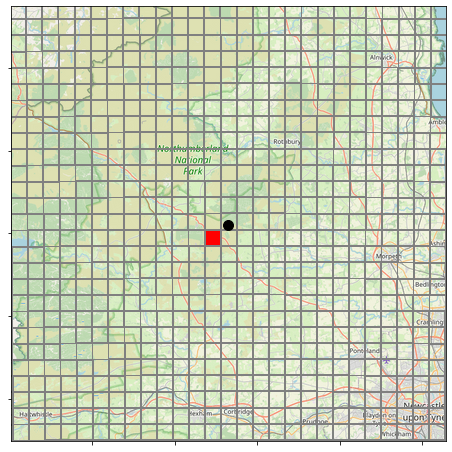

12
(265, 304)


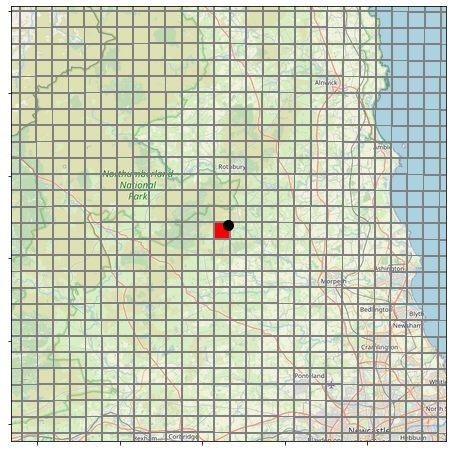

13
(255, 302)


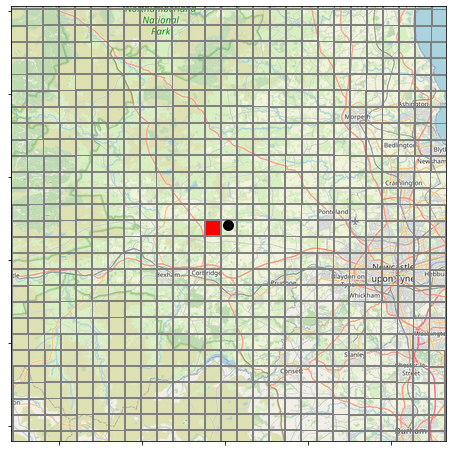

14
(255, 308)


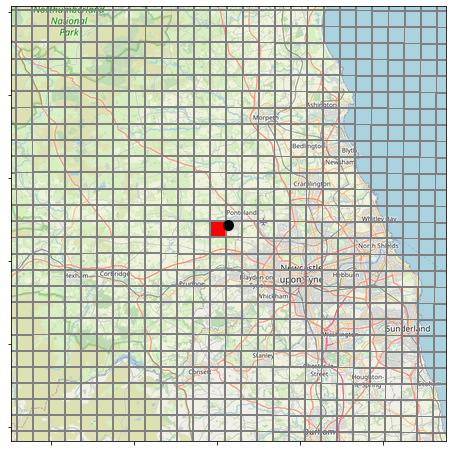

15
(266, 286)


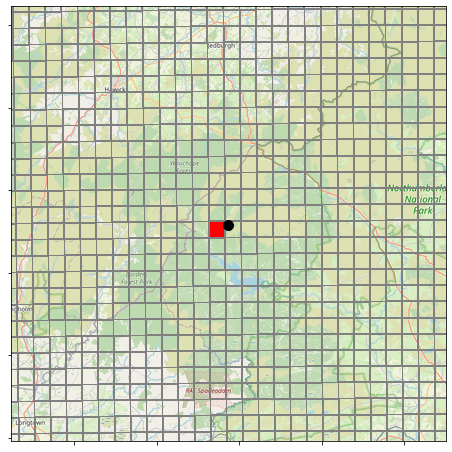

16
(260, 291)


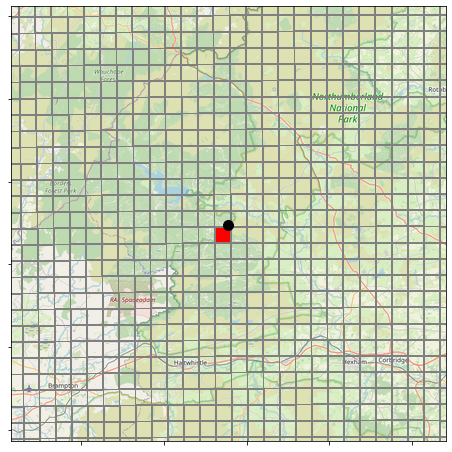

17
(269, 290)


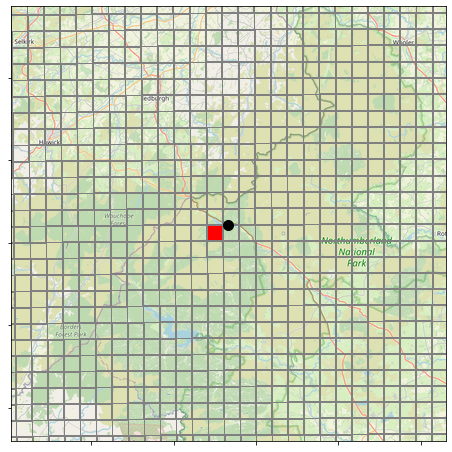

18
(240, 291)


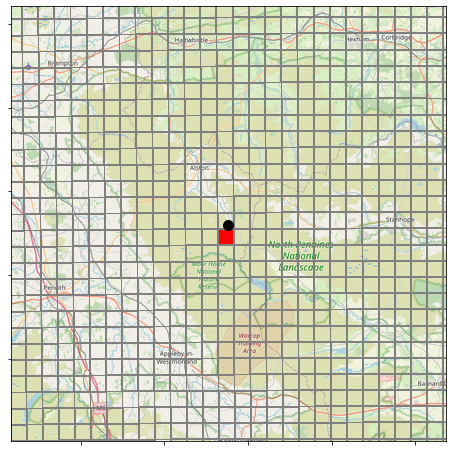

19
(242, 287)


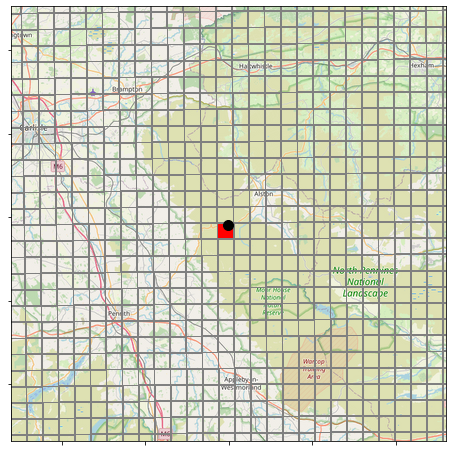

20
(242, 292)


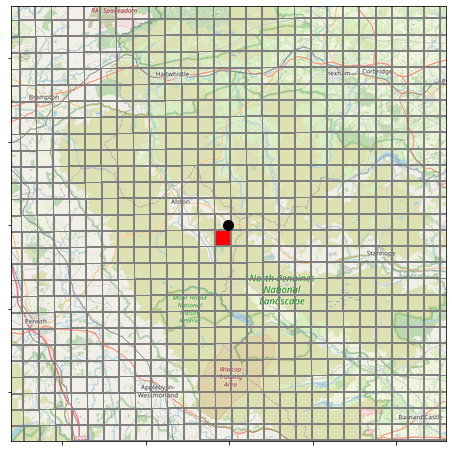

21
(244, 289)


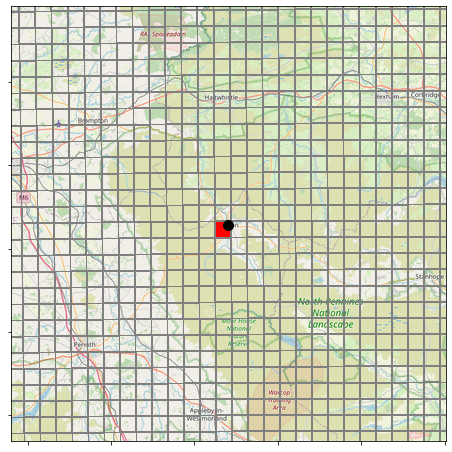

22
(247, 287)


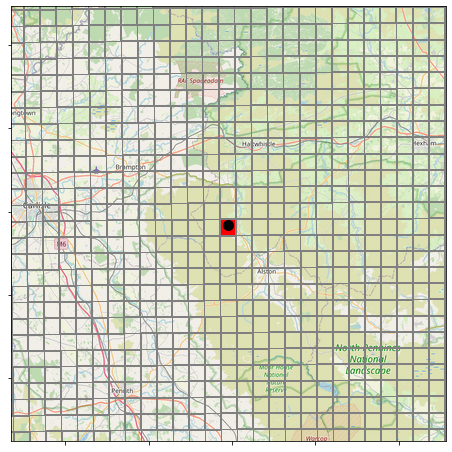

23
(252, 287)


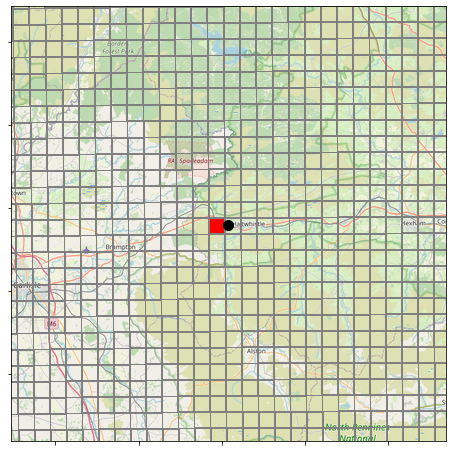

24
(243, 295)


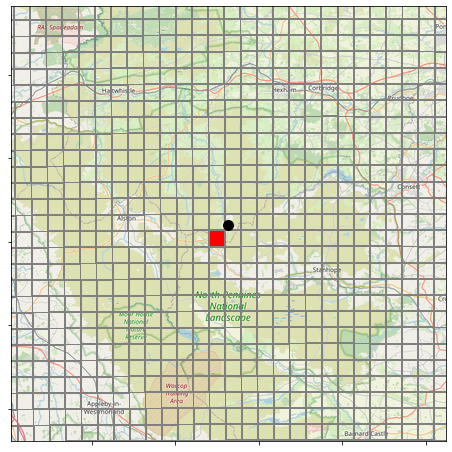

25
(251, 297)


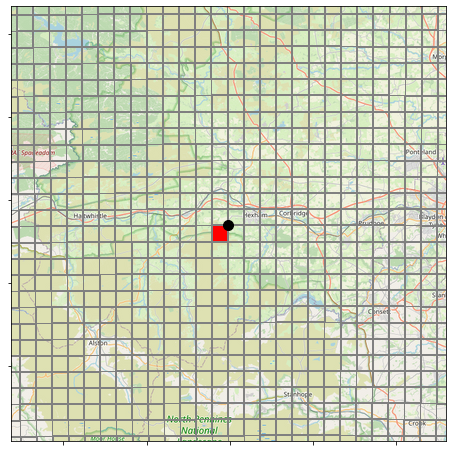

26
(253, 311)


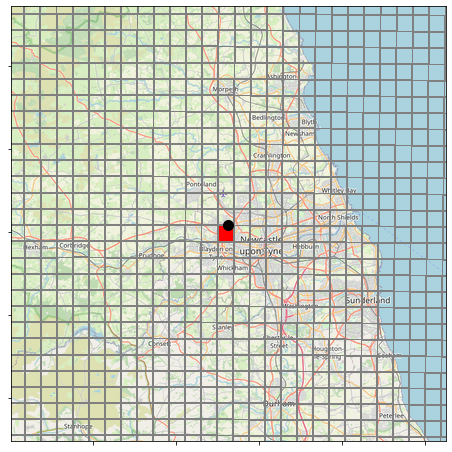

27
(247, 309)


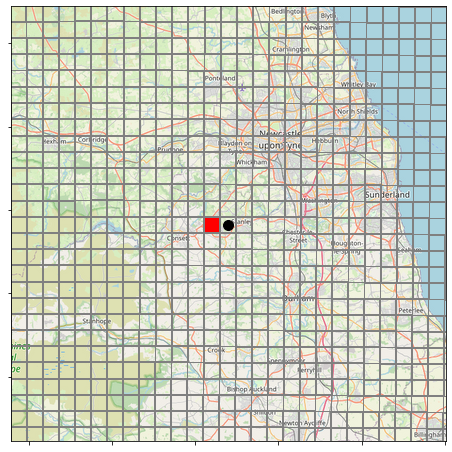

28
(253, 313)


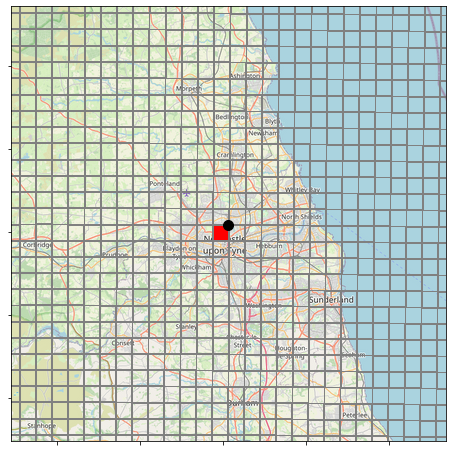

29
(253, 317)


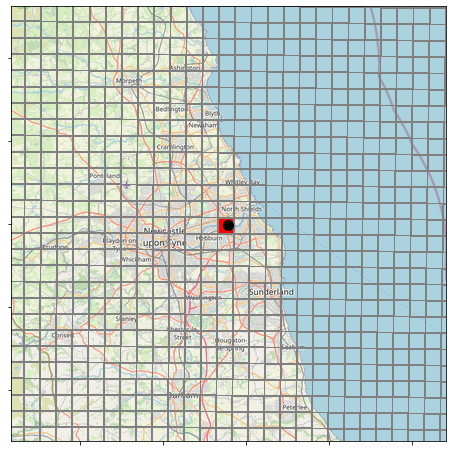

In [12]:
### Read in a sample cube for finding the location of gauge in grid
sample_cube = iris.load(f'/nfs/a319/gy17m2a/PhD/datadir/UKCP18_every30mins/2.2km_bng/bc005/2002_2020/bng_bc005a.pr200508*')[0][1,:,:]

# Get tb0 values at each gauge
tbo_vals = pd.read_csv('/nfs/a319/gy17m2a/PhD/datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')
for gauge_num in range(11, 30):
    print(gauge_num)
    sample_cube = iris.load(f'/nfs/a319/gy17m2a/PhD/datadir/UKCP18_every30mins/2.2km_bng/bc005/2002_2020/bng_bc005a.pr200508*')[0][1,:,:]
    Tb0, idx_2d = find_gauge_Tb0_and_location_in_grid(gauge_num, sample_cube, True)
    idxs_ukcp182.append(idx_2d)

### Find grid cell containing this gauge in NIMROD

(825, 891)
(825, 891)


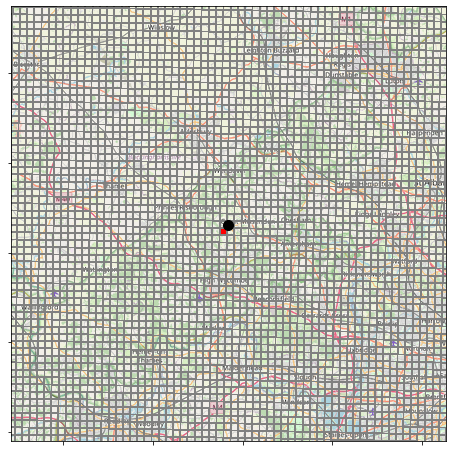

825 891


In [5]:
### Read in a sample cube for finding the location of gauge in grid
sample_cube = iris.load(f'/nfs/a319/gy17m2a/PhD/datadir/NIMROD/30mins/OriginalFormat_1km/2007/metoffice-c-band-rain-radar_uk_20070601_30mins.nc')[0][1,:,:]

# Get tb0 values at each gauge
tbo_vals = pd.read_csv('/nfs/a319/gy17m2a/PhD/datadir/RainGauge/interarrival_thresholds_CDD_noMissing.txt')

Tb0, idx_2d = find_gauge_Tb0_and_location_in_grid(1, sample_cube)

### Get data for this cell over whole time period

In [22]:
all_files=[]
for year in range(2006,2020):
    radardir = f'/nfs/a319/gy17m2a/PhD/datadir/NIMROD/30mins/OriginalFormat_1km/{year}/'

    file_list = glob.glob(radardir + "*.nc")
    sorted_list = sorted(file_list)
    all_files.extend(sorted_list)

    # Load and concatenate cubes
cubes = iris.load(all_files)

# Update metadata of all cubes
for cube in cubes:
    cube.metadata = cubes[0].metadata  

monthly_cube = cubes.concatenate_cube()

# # Extract grid cell data and compute the maximum
this_grid_cell = monthly_cube[:, 825, 891]

ConcatenateError: failed to concatenate into a single cube.
  Data types differ: float64 != float32

In [21]:
monthly_cubes = []

for year in range(2006, 2020):
    radardir = f'/nfs/a319/gy17m2a/PhD/datadir/NIMROD/30mins/OriginalFormat_1km/{year}/'
    file_list = glob.glob(radardir + "*.nc")
    sorted_list = sorted(file_list)
    
    # Load and concatenate cubes for the current year
    cubes = iris.load(sorted_list)
    monthly_cube = cubes.concatenate_cube()
    
    # Update metadata of the cubes
    monthly_cube.metadata = cubes[0].metadata
    
    monthly_cubes.append(monthly_cube)

# Concatenate cubes for all years
combined_cube = iris.cube.CubeList(monthly_cubes).concatenate_cube()

# Extract grid cell data and compute the maximum
this_grid_cell = combined_cube[:, 825, 891]


[]